In [1]:
import importlib
from sympy import init_printing
import symbolic_evolution
import symbolic_fisher


In [2]:
importlib.reload(symbolic_fisher)
importlib.reload(symbolic_evolution)


<module 'symbolic_evolution' from 'C:\\Projects\\Crosstalk\\Symbolic\\symbolic_evolution.py'>

In [119]:
from Symbolic.symbolic_evolution import expectation_value
from symbolic_evolution import zero_state, evolve_state, H, get_expectation_values_exp, apply_operator, random_state, \
    Ry, Rz, Rx, Pauli
from sympy import init_printing, Matrix
from sympy.physics.quantum import TensorProduct

import numpy as np

init_printing(use_latex='mathjax', pretty_print=True, wrap_line=True)

n = 2
rotationY = [0, 0.2]
# rotationZ = [0*np.pi, 0.5*np.pi, 0.5*np.pi]
state = zero_state(n)
# state = random_state(state)
# state = apply_operator(state, Ry(rotationY))
# state = apply_operator(state, Rx(rotationZ))

# state = apply_operator(state, H(n))

state = apply_operator(state, TensorProduct(H(1), Pauli("X")))
state = apply_operator(state, Ry(rotationY))


In [120]:
state

⎡-0.0499167083234141⋅√2⎤
⎢                      ⎥
⎢ 0.497502082639013⋅√2 ⎥
⎢                      ⎥
⎢-0.0499167083234141⋅√2⎥
⎢                      ⎥
⎣ 0.497502082639013⋅√2 ⎦

In [121]:
# IXXI = expectation_value(state, "IXXI", decay=False)
# IXII = expectation_value(state, "IXII", decay=False)
# IIXI = expectation_value(state, "IIXI", decay=False)
# noMeans = 2*IXXI - IXII - IIXI
# XII = expectation_value(state, "XII")
# IXI = expectation_value(state, "IXI")
# IIX = expectation_value(state, "IIX")
# XXI = expectation_value(state, "XXI")
# IXX = expectation_value(state, "IXX")
# XXX = expectation_value(state, "XXX")
state = evolve_state(state)
XI = expectation_value(state, "XI")

In [122]:
XI

0.00996671107937919⋅cos(t⋅ω₀) + 0.990033288920621⋅cos(t⋅(j₀ + ω₀))

In [16]:
IXI

                                                                           -a₁⋅t
(cos(t⋅ω₁) + cos(t⋅(j₀ + ω₁)) + cos(t⋅(j₁ + ω₁)) + cos(t⋅(j₀ + j₁ + ω₁)))⋅ℯ     
────────────────────────────────────────────────────────────────────────────────
                                       4                                        

In [15]:
XII


                                -a₀⋅t
(cos(t⋅ω₀) + cos(t⋅(j₀ + ω₀)))⋅ℯ     
─────────────────────────────────────
                  2                  

In [17]:
IIX

                                -a₂⋅t
(cos(t⋅ω₂) + cos(t⋅(j₁ + ω₂)))⋅ℯ     
─────────────────────────────────────
                  2                  

In [18]:
XXI

                                                                               ↪
(cos(t⋅(ω₀ - ω₁)) + cos(t⋅(j₀ + ω₀ + ω₁)) + cos(t⋅(j₁ - ω₀ + ω₁)) + cos(t⋅(j₀  ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                      4                        ↪

↪                    -t⋅(a₀ + a₁)
↪ + j₁ + ω₀ + ω₁)))⋅ℯ            
↪ ───────────────────────────────
↪                                

In [19]:
IXX

                                                                               ↪
(cos(t⋅(ω₁ - ω₂)) + cos(t⋅(j₀ + ω₁ - ω₂)) + cos(t⋅(j₁ + ω₁ + ω₂)) + cos(t⋅(j₀  ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                      4                        ↪

↪                    -t⋅(a₁ + a₂)
↪ + j₁ + ω₁ + ω₂)))⋅ℯ            
↪ ───────────────────────────────
↪                                

In [20]:
XXX

                                                                               ↪
(cos(t⋅(ω₀ - ω₁ + ω₂)) + cos(t⋅(j₀ + ω₀ + ω₁ - ω₂)) + cos(t⋅(j₁ - ω₀ + ω₁ + ω₂ ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                  4            ↪

↪                                        -t⋅(a₀ + a₁ + a₂)
↪ )) + cos(t⋅(j₀ + j₁ + ω₀ + ω₁ + ω₂)))⋅ℯ                 
↪ ────────────────────────────────────────────────────────
↪                                                         

In [21]:
from Symbolic.symbolic_fisher import gaussian_fisher_matrix

n = 3
init_printing(use_latex='mathjax', pretty_print=True, wrap_line=True)
function = symbolic_evolution.get_expectation_values_exp(n, 0)[0]
function = symbolic_evolution.set_parameters(function, J=[0] * n)
matrix = gaussian_fisher_matrix(function, 3)
matrix

[ω0, t, a0]


⎡                       3                                                   3  ↪
⎢                      ___                                                 ___ ↪
⎢                      ╲                                                   ╲   ↪
⎢                       ╲    2  -2⋅a₀⋅t    2                                ╲  ↪
⎢                       ╱   t ⋅ℯ       ⋅sin (t⋅ω₀)                          ╱  ↪
⎢                      ╱                                                   ╱   ↪
⎢                      ‾‾‾                                                 ‾‾‾ ↪
⎢                     t = 0                                               t =  ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢  3                                                                           ↪
⎢ ___                                                                          ↪
⎢ ╲                         

In [9]:
from qutip_qip.operations import hadamard_transform, snot, phasegate


# Function to create the initial state based on a string
def create_state(state_string):
    state_list = []
    for c in state_string:
        if c == "0":
            state_list.append(basis(2, 0))
        elif c == "1":
            state_list.append(basis(2, 1))
        elif c == "+":
            plus_state = (basis(2, 0) + basis(2, 1)).unit()
            state_list.append(plus_state)
        else:
            raise ValueError(f"Invalid character '{c}' in state string. Allowed characters are '0', '1', '+'.")
    return tensor(state_list)


def sample_measurements(rho, num_shots, measurement_basis):
    """
    Simulates measurements on the density matrix rho in the specified measurement basis and returns counts of outcomes.

    Parameters:
    rho (Qobj): Density matrix of the system.
    num_shots (int): Number of measurement shots.
    measurement_basis (str): String specifying the measurement basis for each qubit (e.g., 'XXZI').

    Returns:
    counts (dict): Dictionary with measurement outcomes as keys and counts as values.
    """
    N = int(np.log2(rho.shape[0]))  # Number of qubits
    if len(measurement_basis) != N:
        raise ValueError("Measurement basis string length must match the number of qubits.")

    # Apply rotation operators to rho based on the measurement basis
    rotation_ops = []
    measured_qubits = []
    for i, basis_char in enumerate(measurement_basis):
        if basis_char == 'X':
            # Rotate to X-basis using Hadamard gate
            rotation_ops.append(hadamard_transform(1))
            measured_qubits.append(i)
        elif basis_char == 'Y':
            # Rotate to Y-basis using S† H (where S† is the adjoint of the phase gate)
            S_dag = phasegate(-np.pi / 2)
            H = snot()
            rotation_ops.append(H * S_dag)
            measured_qubits.append(i)
        elif basis_char == 'Z':
            # No rotation needed for Z-basis measurement
            rotation_ops.append(qeye(2))
            measured_qubits.append(i)
        elif basis_char == 'I':
            # Identity operator; qubit is not measured
            rotation_ops.append(qeye(2))
        else:
            raise ValueError(
                f"Invalid character '{basis_char}' in measurement basis. Allowed characters are 'X', 'Y', 'Z', 'I'.")

    # Build the total rotation operator
    U = tensor(rotation_ops)

    # Rotate the density matrix to the measurement basis
    rho_rotated = U * rho * U.dag()
    rho_rotated = Qobj(rho_rotated.full().reshape(4, 4), dims=[[4], [4]])

    # Trace out qubits that are not measured
    if len(measured_qubits) == 0:
        raise ValueError("At least one qubit must be measured.")

    # Generate the list of computational basis states for the measured qubits
    num_measured = len(measured_qubits)
    basis_states = []
    for i in range(2 ** num_measured):
        state = basis(2 ** num_measured, i)
        basis_states.append(state)

    # Calculate the probabilities for each basis state
    probs = []
    for state in basis_states:
        prob = (state.dag() * rho_rotated * state).real
        probs.append(prob)

    # Normalize probabilities in case of numerical inaccuracies
    probs = np.array(probs)
    probs /= probs.sum()

    # Generate measurement outcomes
    outcomes = np.random.choice(len(basis_states), size=num_shots, p=probs)

    # Convert outcomes to bit strings
    outcome_strings = [format(i, '0{}b'.format(num_measured)) for i in outcomes]

    # Map measured bits back to the full qubit system
    full_outcome_strings = []
    for bits in outcome_strings:
        full_bits = list('0' * N)
        for idx, qubit_idx in enumerate(measured_qubits):
            full_bits[qubit_idx] = bits[idx]
        full_outcome_strings.append(''.join(full_bits))

    # Count the occurrences
    counts = {}
    for outcome in full_outcome_strings:
        counts[outcome] = counts.get(outcome, 0) + 1

    return counts


def calculate_expectation(counts, pauli_string):
    """
    Calculates the expectation value of the Pauli operator specified by pauli_string based on measurement counts.

    Parameters:
    counts (dict): Dictionary with measurement outcomes as keys and counts as values.
    pauli_string (str): String specifying the Pauli operator for each qubit (e.g., 'XXZI').

    Returns:
    expectation_value (float): The expectation value of the specified Pauli operator.
    """
    N = len(pauli_string)
    total_shots = sum(counts.values())
    expectation = 0.0

    # Map measurement outcomes to eigenvalues
    for outcome, count in counts.items():
        eigenvalue = 1
        for i, pauli in enumerate(pauli_string):
            bit = int(outcome[i])
            if pauli in ('X', 'Y', 'Z'):
                if bit == 0:
                    eigenval = 1
                else:
                    eigenval = -1
                eigenvalue *= eigenval
            elif pauli == 'I':
                eigenvalue *= 1  # Identity operator has eigenvalue 1
        expectation += eigenvalue * count

    expectation_value = expectation / total_shots
    return expectation_value

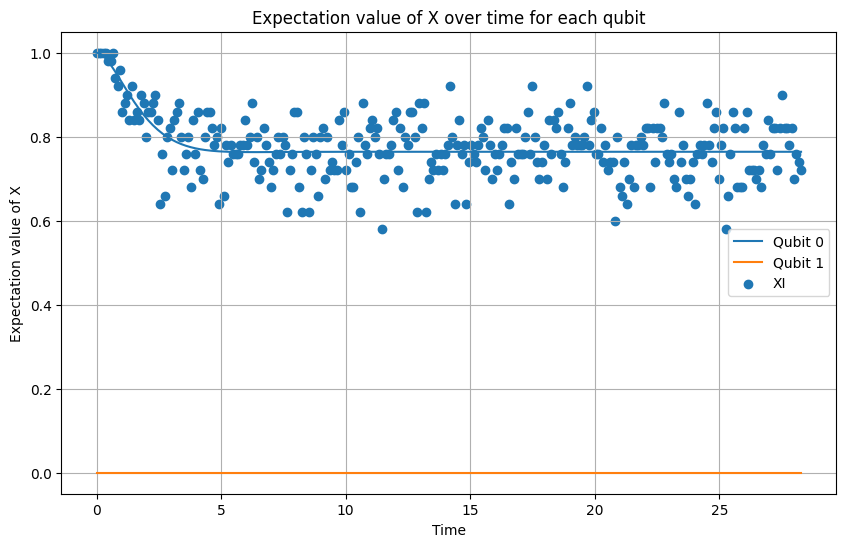

In [144]:
import random
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Number of qubits
N = 2  # You can adjust this number as needed

W = [random.gauss(0, 1) for _ in range(N)]
J = [random.gauss(0, 1) for _ in range(N - 1)]
W = [0, 0]
J = [1]
# Define Gamma rates for each qubit
# Gamma_1_list = [0.3 for _ in range(N)]   # For sigma_+
Gamma_1_list = [0.0, 0.9]
Gamma_2_list = [0.000 for _ in range(N)]  # For sigma_-
Gamma_phi_list = [0 for _ in range(N)]  # For sigma_z

# Time evolution parameters
t_start = 0.0
t_end = 9 * np.pi
num_points = 3 * 100  # Number of time points
times = np.linspace(t_start, t_end, num_points)

# Initial state: tensor product of zero states
psi = create_state("+1")

# Define omega_i for each qubit
# omega_list = [1.0 for _ in range(N)]  # Example values; replace with actual values

# Define J_{i,j} for each qubit pair
J_list = {}
for i in range(N - 1):  # Only connect to the next neighbor
    J_list[(i, i + 1)] = J[i]  # Example coupling strength; replace with actual values

# Construct the Hamiltonian H0
H = 0
identity = tensor([qeye(2) for _ in range(N)])
for i in range(N):
    Z_i = tensor([sigmaz() if n == i else qeye(2) for n in range(N)])
    H += 0.5 * W[i] * (Z_i - identity)

for (i, j), J_ij in J_list.items():
    Z_i = tensor([sigmaz() if n == i else qeye(2) for n in range(N)])
    Z_j = tensor([sigmaz() if n == j else qeye(2) for n in range(N)])
    H += (1 / 8) * J_ij * (Z_i - identity) * (Z_j - identity)

# Define collapse operators
c_ops = []
for i in range(N):
    # sigma_+ operator on qubit i
    sp_i = tensor([sigmap() if n == i else qeye(2) for n in range(N)])
    # sigma_- operator on qubit i
    sm_i = tensor([sigmam() if n == i else qeye(2) for n in range(N)])
    # sigma_z operator on qubit i
    sz_i = tensor([sigmaz() if n == i else qeye(2) for n in range(N)])

    if Gamma_1_list[i] != 0:
        c_ops.append(np.sqrt(Gamma_1_list[i]) * sp_i)
    if Gamma_2_list[i] != 0:
        c_ops.append(np.sqrt(Gamma_2_list[i]) * sm_i)
    if Gamma_phi_list[i] != 0:
        c_ops.append(np.sqrt(Gamma_phi_list[i]) * sz_i)

# Time evolution
result = mesolve(H, psi, times, c_ops, [])

# Calculate expectation values of X for each qubit
expectations = []
for i in range(N):
    X_i = tensor([sigmax() if n == i else qeye(2) for n in range(N)])
    exp_X_i = expect(X_i, result.states)
    expectations.append(exp_X_i)

Counts = []
for i in range(len(times)):
    # print(result.states[i].data.todense())
    counts = sample_measurements(result.states[i], 100, "XX")
    Counts.append(counts)

X = []
for c in Counts:
    X.append(calculate_expectation(c, "XI"))
# Plotting the expectation values
plt.figure(figsize=(10, 6))
for i, exp_X_i in enumerate(expectations):
    plt.plot(times, exp_X_i, label=f'Qubit {i}')
# plt.plot(times,np.cos(W[0]*times), label=f'Analytical Qubit {0}')
plt.scatter(times, X, label=f'XI')

plt.xlabel('Time')
plt.ylabel('Expectation value of X')
plt.title('Expectation value of X over time for each qubit')
plt.legend()
plt.grid(True)
plt.show()


(0.0, 4.0)

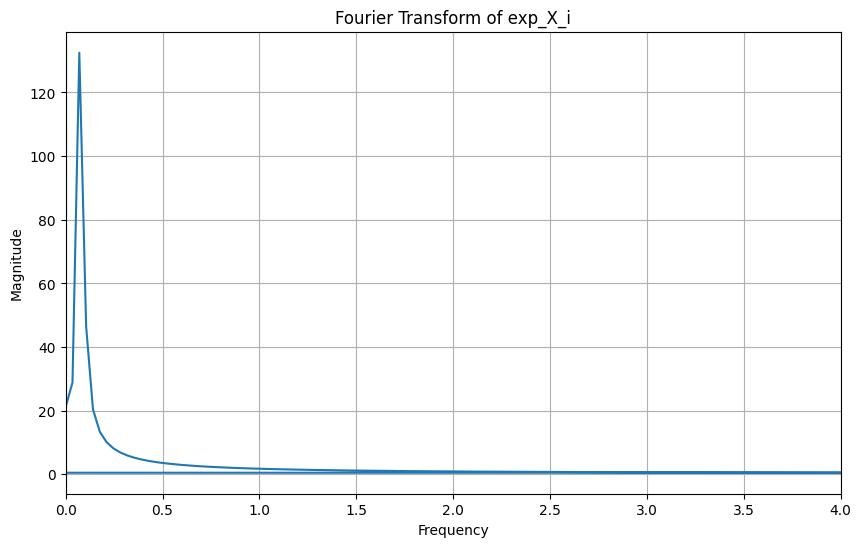

In [135]:
import numpy as np

# Perform the Fourier Transform
exp_X_i_fft = np.fft.fft(expectations[0])

# Get the frequencies corresponding to the Fourier Transform coefficients
frequencies = np.fft.fftfreq(len(expectations[0]), times[1] - times[0])

# Plot the absolute value of the Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(exp_X_i_fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of exp_X_i')
plt.grid(True)
plt.xlim(0, 4)


In [ ]:
from Ramsey_ExperimentV3 import *

N = 2
W = [0, 0]
J_list = [0]
J = {}
for i in range(N - 1):  # Only connect to the next neighbor
    J_list[(i, i + 1)] = J[i]

t = 0.5


In [2]:
from Ramsey_ExperimentV3 import *
T = np.pi
n = 2
total_shots = 100000
delay = np.linspace(0, T, 40)
# delay = np.array([0.3])
W = [random.gauss(0, 0) for _ in range(n)]
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

W = [0,0]
J_list = [1]
L = [0.0 for _ in range(n)]  # For sigma_z

J = {}
for i in range(n - 1):  # Only connect to the next neighbor
    J[(i, i + 1)] = J_list[i]

Gamma_1_list = [0.0001 for _ in range(n)]
Gamma_2_list = [0.0001 for _ in range(n)]  # For sigma_-



batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = ramsey_local(n,total_shots,delay,W,J, Gamma_1_list, Gamma_2_list, L)
exp_det_x = np.transpose(batch_x_det.zi).tolist()
exp_det_y = np.transpose(batch_y_det.zi).tolist()
exp_cross_x = np.transpose(batch_x_cross.zi).tolist()
exp_cross_y = np.transpose(batch_y_cross.zi).tolist()

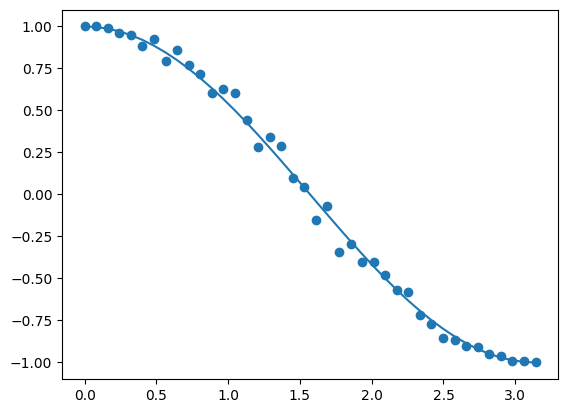

In [3]:
k = 0
t = np.linspace(0, T, 40)
plt.scatter(delay, exp_cross_x[k])
# plt.plot(T, np.cos(W[k]*T))
plt.plot(t, np.cos((W[k] + J_list[k])*t)*np.exp(-L[k]*t))

In [14]:

import estimator

guessed_decay,guessed_W,guessed_J = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J_list)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J_list])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)

guessed decay:  [4.919175962921201e-05, 0.0003262106637746545]
real decay:  [0.0, 0.0]
guessed frequency:  [-0.004513805872854814, -0.00035359086894813473]
real frequency:  [0.0, 0.0]
guessed J:  [0.9693250311602951]
real J:  [1.0]
error:  0.01386767476186014
error in percent:  6.933837380930069
